[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SeoulTechPSE/EngNm/blob/master/ch03_code.ipynb)

# Chpater 3: Symbolic computing

Creator: Robert Johansson, Updator: Kee-Youn Yoo

Code Listings for Numerical Python (ISBN 978-1-484205-54-9).    

In [1]:
"""
# Rendering sympy equations requires MathJax to be available within each cell output. 
# The following is a function that will make this happen for Colab.

from IPython.display import Math, HTML
def enable_sympy_in_cell():
  display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', enable_sympy_in_cell)
"""

'\n# Rendering sympy equations requires MathJax to be available within each cell output. \n# The following is a function that will make this happen for Colab.\n\nfrom IPython.display import Math, HTML\ndef enable_sympy_in_cell():\n  display(HTML("<script src=\'https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default\'></script>"))\nget_ipython().events.register(\'pre_run_cell\', enable_sympy_in_cell)\n'

## Importing sympy

In [2]:
import sympy
sympy.init_printing()
from sympy import I, pi, oo

## Symbols

In [3]:
x = sympy.Symbol("x")

In [4]:
y = sympy.Symbol("y", real=True)
y.is_real

True

In [5]:
print(x.is_real)

None


In [6]:
sympy.Symbol("z", imaginary=True).is_real

False

---

In [7]:
x = sympy.Symbol("x")
y = sympy.Symbol("y", negative=True)

In [8]:
sympy.sqrt(x**2)

In [9]:
sympy.sqrt(y**2)

In [10]:
n1 = sympy.Symbol("n")

In [11]:
n2 = sympy.Symbol("n", integer=True)

In [12]:
n3 = sympy.Symbol("n", odd=True)

In [13]:
sympy.cos(n1*pi)

In [14]:
sympy.cos(n2*pi)

In [15]:
sympy.cos(n3*pi)

---

In [16]:
a, b, c = sympy.symbols("a, b, c", negative=True)

In [17]:
d, e, f = sympy.symbols("d, e, f", positive=True)

## Numbers

* We cannot directly use the built-in Python objects for integers, `int`, and floating-point numbers, `float`, and so on. Instead, Sympy provides the classes `sympy.Integer` and `sympy.Float` for representing integers and floating-point numbers within the Sympy
framework. 

* This distinction is important to be aware of when working with Sympy, but fortunately we rarely
need to concern ourselves with creating objects of type `sympy.Integer` and `sympy.Float` to representing
specific numbers, since Sympy automatically promotes Python numbers to instances of these classes when
they occur in Sympy expressions.

In [18]:
i = sympy.Integer(18)

In [19]:
type(i)

sympy.core.numbers.Integer

In [20]:
i.is_Integer, i.is_real, i.is_odd

(True, True, False)

In [21]:
f = sympy.Float(2.3)

In [22]:
type(f)

sympy.core.numbers.Float

In [23]:
f.is_Integer, f.is_real, f.is_odd

(False, True, False)

In [24]:
i, f = sympy.sympify(19), sympy.sympify(2.3)

In [25]:
type(i), type(f)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

### Integer

While the `Symbol` with `integer=True` represents some integer, the Integer instance represents a
specific integer. For both cases, the `is_integer` attribute is `True`, but there is also an attribute `is_Integer`
(note the capital `I`), which is only True for Integer instances.

In [26]:
n = sympy.Symbol("n", integer=True)

In [27]:
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [28]:
i = sympy.Integer(19)

In [29]:
i.is_integer, i.is_Integer, i.is_positive, i.is_Symbol

(True, True, True, False)

Integers in Sympy are **arbitrary precision**, meaning that they have no fixed lower and upper bounds,
which is the case when representing integers with a specific bit-size, as, for example, in Numpy.

In [30]:
i**50

In [31]:
sympy.factorial(100)

### Float

Like `Integer`, `Float` is **arbitrary precision**, in contrast to Python’s built-in `float` type and the `float` types in Numpy. This means that any `Float` can represent a `float` with arbitrary number of decimals. When a `Float` instance is created
using its constructor, there are two arguments: the first argument is a Python float or a string representing a
floating-point number, and the second (optional) argument is the precision (number of significant decimal
digits) of the `Float` object.

In [32]:
"%.25f" % 0.3  # create a string representation with 25 decimals

'0.2999999999999999888977698'

In [33]:
sympy.Float(0.3, 25)

In [34]:
sympy.Float('0.3', 25)

### Rational

In [35]:
sympy.Rational(11, 13)

In [36]:
r1 = sympy.Rational(2, 3)

In [37]:
r2 = sympy.Rational(4, 5)

In [38]:
r1 * r2

In [39]:
r1 / r2

### Constants and special symbols

In [40]:
[sympy.pi, sympy.E, sympy.EulerGamma, sympy.I, sympy.oo]

### Functions

In [41]:
x, y, z = sympy.symbols("x, y, z")

In [42]:
f = sympy.Function("f")

In [43]:
type(f)

sympy.core.function.UndefinedFunction

In [44]:
f(x)

In [45]:
g = sympy.Function("g")(x, y, z)

In [46]:
g

In [47]:
g.free_symbols

---

In [48]:
sympy.sin

sin

In [49]:
sympy.sin(x)

In [50]:
sympy.sin(pi * 1.5)

In [51]:
n = sympy.Symbol("n", integer=True)

In [52]:
sympy.sin(pi * n)

In [53]:
h = sympy.Lambda(x, x**2); h

In [54]:
h(5)

In [55]:
h(1 + x)

## Expressions

In [56]:
x = sympy.Symbol("x")

In [57]:
expr = 1 +2*x**2 +3*x**3; expr

In [58]:
expr.args

In [59]:
expr.args[1]

In [60]:
expr.args[1].args

In [61]:
expr.args[1].args[1]

In [62]:
expr.args[1].args[1].args

In [63]:
expr.args[1].args[1].args[1]

In [64]:
expr.args[1].args[1].args[1].args

## Manipulating expressions

### Simlification

In [65]:
expr = 2 * (x**2 - x) - x * (x + 1); expr

In [66]:
sympy.simplify(expr)

In [67]:
expr.simplify()

In [68]:
expr

---

In [69]:
expr = 2 * sympy.cos(x) * sympy.sin(x); expr

In [70]:
sympy.simplify(expr)

In [71]:
expr = sympy.exp(x) * sympy.exp(y); expr

In [72]:
sympy.simplify(expr)

### Expand

In [73]:
expr = (x + 1) * (x + 2)

In [74]:
sympy.expand(expr)

In [75]:
sympy.sin(x + y).expand(trig=True)

In [76]:
a, b = sympy.symbols("a, b", positive=True)

In [77]:
sympy.log(a * b).expand(log=True)

In [78]:
sympy.exp(I*a + b).expand(complex=True)

In [79]:
sympy.expand((a * b)**x, power_base=True)

In [80]:
sympy.exp(I*(a -b)*x).expand(power_exp=True)

### Factor, collect and combine

In [81]:
sympy.factor(x**2 - 1)

In [82]:
sympy.factor(x *sympy.cos(y) + sympy.sin(z) *x)

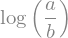

In [83]:
sympy.logcombine(sympy.log(a) - sympy.log(b))

In [84]:
expr = x + y + x * y * z

In [85]:
expr.collect(x)

In [86]:
expr.collect(y)

In [87]:
expr = sympy.cos(x + y) + sympy.sin(x - y)

In [88]:
expr1 = expr.expand(trig=True); expr1

In [89]:
expr2 = expr1.collect([sympy.cos(x), sympy.sin(x)]); expr2

In [90]:
expr3 = expr2.collect(sympy.cos(y) - sympy.sin(y)); expr3

### Apart, together, and cancel

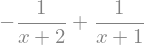

In [91]:
sympy.apart(1/(x**2 + 3*x + 2), x)

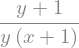

In [92]:
sympy.together(1 / (y * x + y) + 1 / (1+x))

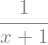

In [93]:
sympy.cancel(y / (y * x + y))

### Substitutions

In [94]:
(x + y).subs(x, y)

In [95]:
sympy.sin(x * sympy.exp(x)).subs(x, y)

In [96]:
sympy.sin(x * z).subs({z: sympy.exp(y), x: y, sympy.sin: sympy.cos})

In [97]:
expr = x * y + z**2 *x

In [98]:
values = {x: 1.25, y: 0.4, z: 3.2}

In [99]:
expr.subs(values)

## Numerical evaluation

In [100]:
sympy.N(1 + pi)

In [101]:
sympy.N(pi, 50)

In [102]:
(x + 1/pi).evalf(10)

---

In [103]:
expr = sympy.sin(pi * x * sympy.exp(x))

In [104]:
[expr.subs(x, xx).evalf(3) for xx in range(0, 10)]  # rather slow

In [105]:
expr_func = sympy.lambdify(x, expr)

In [106]:
expr_func(1.0)

In [107]:
expr_func = sympy.lambdify(x, expr, 'numpy')

In [108]:
import numpy as np

In [109]:
xvalues = np.arange(0, 10)

In [110]:
expr_func(xvalues)  # efficient method

array([ 0.        ,  0.77394269,  0.64198244,  0.72163867,  0.94361635,
        0.20523391,  0.97398794,  0.97734066, -0.87034418, -0.69512687])

## Calculus

### Derivatives

In [111]:
f = sympy.Function('f')(x)

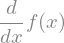

In [112]:
sympy.diff(f, x) # equivalent to f.diff(x)

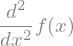

In [113]:
sympy.diff(f, x, x)

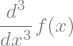

In [114]:
sympy.diff(f, x, 3) # equivalent to sympy.diff(f, x, x, x)

In [115]:
g = sympy.Function('g')(x, y)

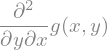

In [116]:
g.diff(x, y) # equivalent to sympy.diff(g, x, y)

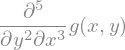

In [117]:
g.diff(x, 3, y, 2) # equivalent to sympy.diff(g, x, x, x, y, y)

---

In [118]:
expr = x**4 + x**3 + x**2 + x + 1

In [119]:
expr.diff(x)

In [120]:
expr.diff(x, x)

In [121]:
expr = (x + 1)**3 * y ** 2 * (z - 1)

In [122]:
expr.diff(x, y, z)

---

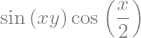

In [123]:
expr = sympy.sin(x * y) * sympy.cos(x / 2); expr

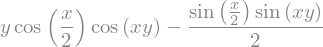

In [124]:
expr.diff(x)

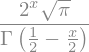

In [125]:
expr = sympy.functions.special.polynomials.hermite(x, 0); expr

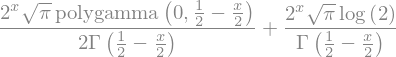

In [126]:
expr.diff(x).doit()

---

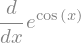

In [127]:
d = sympy.Derivative(sympy.exp(sympy.cos(x)), x); d

In [128]:
d.doit()

### Integrals

In [129]:
a, b, x, y = sympy.symbols("a, b, x, y")

In [130]:
f = sympy.Function("f")(x)

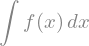

In [131]:
sympy.integrate(f)

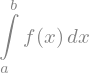

In [132]:
sympy.integrate(f, (x, a, b))

---

In [133]:
sympy.integrate(sympy.sin(x))

In [134]:
sympy.integrate(sympy.sin(x), (x, a, b))

In [135]:
sympy.integrate(sympy.exp(-x**2), (x, 0, oo))

In [136]:
a, b, c = sympy.symbols("a, b, c", positive=True)

In [137]:
sympy.integrate(a * sympy.exp(-((x -b)/c)**2), (x, -oo, oo))

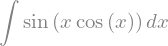

In [138]:
sympy.integrate(sympy.sin(x * sympy.cos(x)))

In [139]:
expr = sympy.sin(x*sympy.exp(y))

In [140]:
sympy.integrate(expr, x)

In [141]:
expr = (x + y)**2

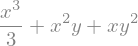

In [142]:
sympy.integrate(expr, x)

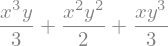

In [143]:
sympy.integrate(expr, x, y)

In [144]:
sympy.integrate(expr, (x, 0, 1), (y, 0, 1))

### Series

In [145]:
 sympy.limit(sympy.sin(x) / x, x, 0)

In [146]:
f = sympy.Function('f')

In [147]:
x, h = sympy.symbols("x, h")
diff_limit = (f(x + h) - f(x))/h

In [148]:
sympy.limit(diff_limit.subs(f, sympy.cos), h, 0)

In [149]:
sympy.limit(diff_limit.subs(f, sympy.sin), h, 0)

In [150]:
expr = (x**2 - 3*x) / (2*x - 2)

In [151]:
p = sympy.limit(expr/x, x, sympy.oo)

In [152]:
q = sympy.limit(expr - p*x, x, sympy.oo)

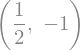

In [153]:
p, q

### Sums and products

In [154]:
n = sympy.symbols("n", integer=True)

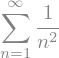

In [155]:
x = sympy.Sum(1/(n**2), (n, 1, oo)); x

In [156]:
x.doit()

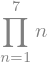

In [157]:
x = sympy.Product(n, (n, 1, 7)); x

In [158]:
x.doit()

In [159]:
x = sympy.Symbol("x")

In [160]:
sympy.Sum((x)**n/(sympy.factorial(n)), (n, 1, oo)).doit().simplify()

## Equations

In [161]:
x = sympy.Symbol("x")

In [162]:
sympy.solve(x**2 + 2*x - 3)

In [163]:
a, b, c = sympy.symbols("a, b, c")

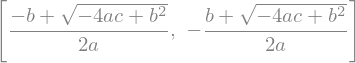

In [164]:
sympy.solve(a * x**2 + b * x + c, x)

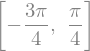

In [165]:
sympy.solve(sympy.sin(x) - sympy.cos(x), x)

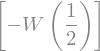

In [166]:
sympy.solve(sympy.exp(x) + 2 *x, x)

The LambertW function $W(z)$ is defined as the inverse function of $w\exp(w)$

In [167]:
-sympy.LambertW(1/2)

In [168]:
sympy.solve(x**5 - x**2 + 1, x)

In [169]:
sympy.solve(sympy.tan(x) + x, x)

NotImplementedError: multiple generators [x, tan(x)]
No algorithms are implemented to solve equation x + tan(x)

---

In [170]:
eq1 = x + 2 * y - 1
eq2 = x - y + 1

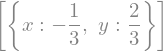

In [171]:
sympy.solve([eq1, eq2], [x, y], dict=True)

In [172]:
eq1 = x**2 - y
eq2 = y**2 - x

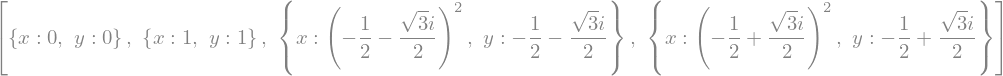

In [173]:
sols = sympy.solve([eq1, eq2], [x, y], dict=True); sols

In [174]:
[eq1.subs(sol).simplify() == 0 and eq2.subs(sol).simplify() == 0 for sol in sols]

[True, True, True, True]

## Linear algebra

In [175]:
sympy.Matrix([1,2])

In [176]:
sympy.Matrix([[1,2]])

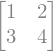

In [177]:
sympy.Matrix([[1, 2], [3, 4]])

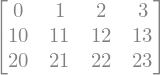

In [178]:
sympy.Matrix(3, 4, lambda m, n: 10 * m + n)

In [179]:
a, b, c, d = sympy.symbols("a, b, c, d")

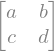

In [180]:
M = sympy.Matrix([[a, b], [c, d]]); M

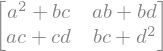

In [181]:
M * M  # Matrix multiplication

In [182]:
x = sympy.Matrix(sympy.symbols("x_1, x_2"))

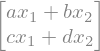

In [183]:
M * x

---

In [184]:
p, q = sympy.symbols("p, q")

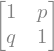

In [185]:
M = sympy.Matrix([[1, p], [q, 1]]); M

In [186]:
b = sympy.Matrix(sympy.symbols("b_1, b_2")); b

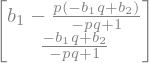

In [187]:
x = M.LUsolve(b); x

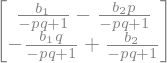

In [188]:
x = M.inv() * b; x

## ODE

In [190]:
x = sympy.Symbol("x")
f = sympy.Function('f')

In [193]:
sympy.dsolve(sympy.Derivative(f(x), x, x) +9 *f(x), f(x))

In [194]:
eq = sympy.sin(x) *sympy.cos(f(x)) + sympy.cos(x) *sympy.sin(f(x))*f(x).diff(x)

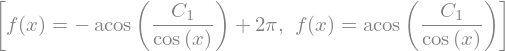

In [195]:
sympy.dsolve(eq, hint='1st_exact')

In [201]:
t = sympy.symbols('t')
x, y = sympy.Function('x'), sympy.Function('y')

In [206]:
eq = (sympy.Eq(sympy.Derivative(x(t),t), 12*t*x(t) + 8*y(t)), sympy.Eq(sympy.Derivative(y(t),t), 21*x(t) + 7*t*y(t)))

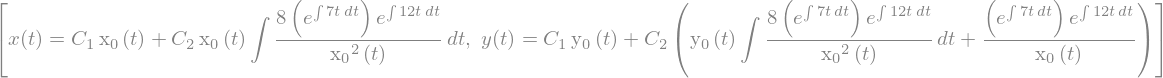

In [207]:
sympy.dsolve(eq)

In [209]:
eq = (sympy.Eq(sympy.Derivative(x(t),t), x(t)*y(t)*sympy.sin(t)), sympy.Eq(sympy.Derivative(y(t),t),y(t)**2*sympy.sin(t)))


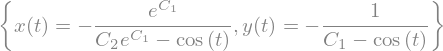

In [210]:
sympy.dsolve(eq)

## Versions

In [ ]:
print("numpy: ", np.__version__)
print("sympy: ", sympy.__version__)